In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import re
import string

In [37]:
pd.set_option('max_colwidth', 150)
df = pd.read_csv('C:\\Users\\Arunkumar DS\\Downloads\\archive (1)\\COVID-19_Sentiments.csv')
df.drop_duplicates(subset='Text',inplace=True)

In [38]:
df

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on.\n\nMosques are open.\n\nMuIIahs are saying Corona won't harm if you read qalma.\n\nTiktokiye are m…,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0.000000
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of a Kolkata officer, son of Railway official, and a famous elite singer. All these are very in…",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",0.350000
3,1241032877099237379,RT @narendramodi: The young actors have something to say..\n\nIts time to be 'Zyada Savdhan' and do 'Corona ka Punchnama'! #IndiaFightsCorona…,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",0.125000
5,1241032877107642368,RT @narendramodi: Explosive batsmen who've seen teams through crises have something to say to us.\n\nWe too will come together to fight COVID…,Fri Mar 20 16:04:29 +0000 2020,India,0.000000
6,1241032873060294656,RT @gkd600: No more spreading Rumors. This is the official website for CORONA updates. Updating every 4 hrs.. \nKeep This link for getti…,Fri Mar 20 16:04:28 +0000 2020,India,-0.250000
...,...,...,...,...,...
324468,1266955713118638080,RT @INCRajasthan: PM Modi came to power promising 2 crore jobs a year. But India witnessed the highest unemployment rate in 45 years in 201…,Sun May 31 04:52:35 +0000 2020,"Sawai Madhopur, India",0.200000
324470,1266955725995077633,@KAMALSARIN6 @ShamikaRavi @PMOIndia @narendramodi @drharshvardhan @NITIAayog @muditkapoor We will not save economy and lives both. Consumer at hom...,Sun May 31 04:52:38 +0000 2020,India,0.032955
324474,1266955718772559873,"For the first time perhaps, someone to took time to acknowledge and appreciate the efforts of the government instead of pure critisism. \n\nGood p...",Sun May 31 04:52:36 +0000 2020,India,0.446429
324476,1266955735537266688,Odisha reports 129 new #COVID19 positive cases; taking the total number of cases to 1948. Active cases stand at 889: State Health Department.,Sun May 31 04:52:40 +0000 2020,"New Delhi, India",0.057576


In [39]:
#shape of the data
df.shape


(161688, 5)

In [40]:
#Missing values present
df.isnull().sum()

Text_Id          0
Text             0
Date             0
Location         0
Sentiments    2611
dtype: int64

In [41]:
df.nunique()

Text_Id       161688
Text          161688
Date          111213
Location        6083
Sentiments      6294
dtype: int64

In [42]:
df['Location'].unique()[:60]

array(['Uttar Pradesh, India', 'Jodhpur, India', 'Gurugram, Bharat',
       'India', 'New Delhi, INDIA', 'Pune, Maharashtra, India', 'Chennai',
       'Hyderabad, India', 'Lucknow, India', 'New Delhi, India',
       'Ahmadabad City, India', 'Thoothukkudi, India', 'Rajasthan, India',
       'Karnataka, India', 'Pune, India', 'Jabalpur, India',
       'Ranchi, India', 'chennai', 'Gaya, India', 'mumbai',
       'Kolkata, India', 'Gandhidham, India', 'Tamil Nadu, India',
       'Gujarat, India', 'Gandhinagar, India', 'Mumbai',
       'CUTTACK, ODISHA, INDIA', 'Velachery, Chennai',
       'Coimbatore, India', 'Gonda, India', 'Khandwa, India',
       "Barkuru (Udupi)/B'lore,India", 'Vikhroli West, Mumbai',
       'Bengaluru, India', 'Thane, India', 'Sirsa, India',
       'Varanasi, India', 'Gurgaon, India', 'Chennai ', 'Bharat',
       'India, Visakhapatnam', 'INDIA', 'india', 'Shujalpur, India',
       'Chembur, Mumbai', 'NCR, India', 'Rewa, India', 'Surat, India',
       'Bharat ', 'Virudh

In [43]:
df ['cnt mentions']=df ['Text'].apply(lambda x : len([t for t in x.split() if t.startswith('@')]))
df ['cnt mentions'].describe()


count    161688.000000
mean          1.306417
std           1.976256
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          50.000000
Name: cnt mentions, dtype: float64

In [44]:
df [df ['cnt mentions']==50]

,Text_Id,Text,Date,Location,Sentiments,cnt mentions
16685,1241942742374027264,@Adtiya024 @PNRATHOD1 @ghanshyam2710 @shyamkuma9694 @sushiljain01 @artewari @Sanjeevarora64 @DigvijaynathTi4 @vijay2437888367 @KunjKishore @Swwaga...,Mon Mar 23 04:19:58 +0000 2020,"New Delhi, India",0.250000,50
36705,1243084840087326722,@WHO @WHO_Europe @WHOSEARO @UNICEF @UN @UNinIndia @UNICEFIndia @UNDP_India @UNFPA @unwomenindia @BBCWorld @BBCIndia @UN_News_Centre @the_hindu @wa...,Thu Mar 26 07:58:15 +0000 2020,"New Delhi, India",0.000000,50
37091,1243085594776895490,@Naveen_Odisha @SecyChief @HFWOdisha @Kalingatv @CMO_Odisha @soumyajitt @OmmcomNews @gapg_dept @nhmodisha @nabadasjsg @BhruguBJP @NandighoshaTV @s...,Thu Mar 26 08:01:15 +0000 2020,"New Delhi, India",0.000000,50
48172,1244551193021435905,@AnkushD65021363 @AjitsinhJagirda @nair_hena @Satishrathod100 @Drsunandambal @GenDADange @colkt @dharmvirjangra9 @macharajarao @NationmyFamily @si...,Mon Mar 30 09:05:01 +0000 2020,India,-0.125000,50
49289,1244554546367680512,@scrapravi @Tamil1947 @dennisckurian @watdehel @mujworld @ravinan30310294 @Deep4IND @sunilddesai @javeedmg @WuntakalL @SyedMJahangeer1 @shenaz_ira...,Mon Mar 30 09:18:21 +0000 2020,"Hyderabad, India",-0.525000,50
63244,1244881088058548224,@abs_handy @MeraGurgaon @wrwre @Malthusian20 @TanmayGuha74 @nbansalggn @amandchawla @whatsupgurgaon @parashar_vipin @Sk38skSushil @DhruvTandon3 @n...,Tue Mar 31 06:55:54 +0000 2020,India,0.000000,50
73193,1245606272767909891,@nrajabpcl @sangitaRchopra @NRRVijayakumar @narendramodi @PMOIndia @drmonika_langeh @savitha_rao @ModiBrigade_Ind @SoniaGurnani19 @TheIndianMukesh...,Thu Apr 02 06:57:32 +0000 2020,Bharat,0.278175,50
75296,1245612450466037765,@scrapravi @SyedMJahangeer1 @ParveenKader @ravinan30310294 @mujworld @Deep4IND @dennisckurian @javeedmg @iKaustubhMishra @siddiq_mifra @aawara_aat...,Thu Apr 02 07:22:05 +0000 2020,"Faridabad, India",0.000000,50
78186,1245621591808995328,@sureshseshadri1 @NetaNiyanta @Harish20902711 @Dr_MR_Satapathy @vinodimsr @ArunDeshpande20 @ParasKGhelani @AnkushD65021363 @AjitsinhJagirda @Sumit...,Thu Apr 02 07:58:24 +0000 2020,India,-0.155556,50
92041,1246340662917615617,@nrajabpcl @sreeramjvc @NationalistIn14 @Ashtalakshmi8 @athavale_abhi @ToTheeePoint @chitranayal09 @LaxmanManjunath @sushilsuni @TheIndianMukesh @...,Sat Apr 04 07:35:44 +0000 2020,India,0.200000,50


In [45]:
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

#df['cleaned']=df['Text'].apply(lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip())

# remove urls 

df['cleaned'] = df['Text'].replace(r'http\S+', ' ', regex=True)

# convert to lowercase
df['cleaned']=df['cleaned'].str.lower()

# removing account names -- basically after @ words -- those are usernames

df['cleaned']=df['cleaned'].apply(lambda x :[t for t in x.split() if not t.startswith('@')] ).apply(lambda x: ' '.join(x))

# removing special characters 
df['cleaned'] = df['cleaned'].replace(r'[^A-Za-z]+', ' ', regex=True)

#removing extra spaces 
df['cleaned']=df['cleaned'].apply(lambda x : x.strip())

# removing stopwords
stop = stopwords.words('english')
stop.extend(['amp','aaa','rt'])

df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print('Shape of dataset',df.shape)

# removing completely blank records 
df=df[df['cleaned']!='']

print('After removing empty records, shape of the dataset',df.shape)

Shape of dataset (161688, 7)
After removing empty records, shape of the dataset (161161, 7)


In [11]:
!pip install wordcloud


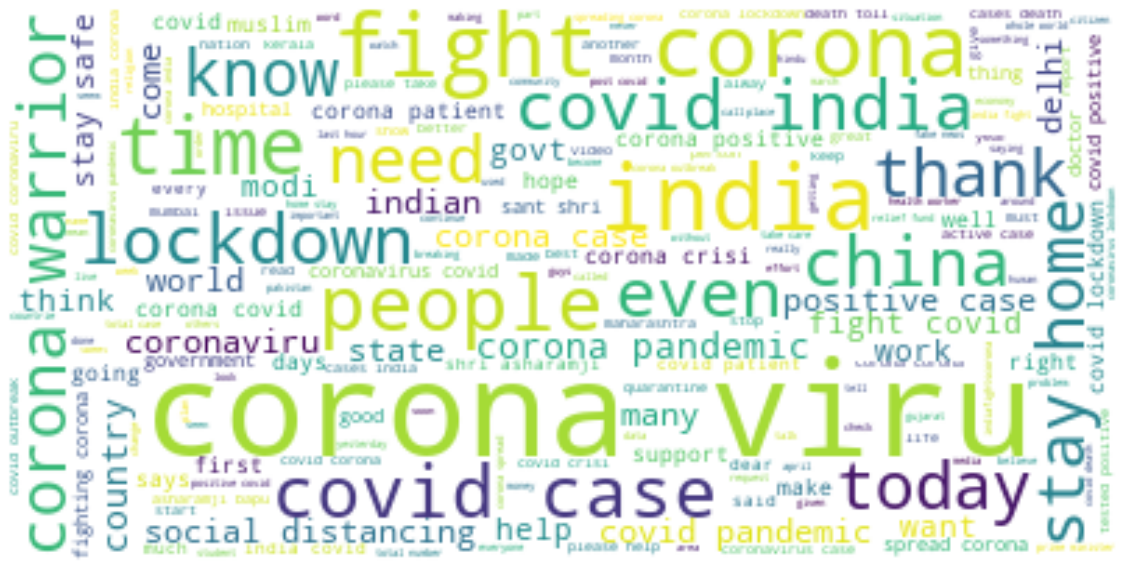

In [12]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

text=" ".join (review for review in df['cleaned']) 
stopwords = set (STOPWORDS)

stopwords.update(['will', 'say', 'still', 'amp'])
wordcloud = WordCloud (stopwords=stopwords, background_color="white", min_word_length=4, collocation_threshold = 20).generate (text)

plt.figure(figsize= (20, 20))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [13]:
## Creating document term matrix using TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=3, stop_words='english',ngram_range=(1,2))
dtm = tfidf.fit_transform(df['cleaned'])

 # sparse matrix of 41122(no. of tweets) * 43359(unigrams and bigrams)
dtm       

<161161x121187 sparse matrix of type '<class 'numpy.float64'>'
	with 2628839 stored elements in Compressed Sparse Row format>

In [14]:
# creating NMF model with 10 components

nmf_model = NMF(n_components=10,random_state=42)

# fitting and transforming dtm obtained,
# to get weights corresponding to belongingness of the document to each topic

topics=nmf_model.fit_transform(dtm)

In [15]:
# coefficient weights for the document0, 
#higher coefficient weights implies higher chances of belonging into particular topic.

topics[0]  

array([6.08526291e-03, 1.10689243e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.39997030e-05, 0.00000000e+00,
       0.00000000e+00, 4.88453200e-04])

In [16]:
tfidf.get_feature_names()

['aa',
 'aa gai',
 'aa gaya',
 'aa gaye',
 'aa raha',
 'aa rahe',
 'aa rhe',
 'aab',
 'aadat',
 'aadhaar',
 'aadhaar number',
 'aadhan',
 'aadhan read',
 'aadhar',
 'aadhar card',
 'aadhar number',
 'aaditya',
 'aaditya thackeray',
 'aadmi',
 'aag',
 'aaganwadi',
 'aaganwadi workers',
 'aage',
 'aah',
 'aah pasbaaneadab',
 'aahe',
 'aahet',
 'aai',
 'aai issues',
 'aaj',
 'aaj ki',
 'aaj raat',
 'aaj tak',
 'aajadi',
 'aajnews',
 'aajtak',
 'aajtak zeenews',
 'aakhir',
 'aala',
 'aam',
 'aam aadmi',
 'aam janta',
 'aameen',
 'aamir',
 'aamir khan',
 'aamirkhan',
 'aana',
 'aana celebration',
 'aane',
 'aanganwadi',
 'aani',
 'aao',
 'aaophirsediyajalayen',
 'aap',
 'aap andar',
 'aap bhi',
 'aap bjp',
 'aap corona',
 'aap government',
 'aap govt',
 'aap ka',
 'aap ke',
 'aap ki',
 'aap ko',
 'aap log',
 'aap logo',
 'aap mat',
 'aap mla',
 'aap party',
 'aap punjab',
 'aap rajya',
 'aap sabhi',
 'aap se',
 'aap supporter',
 'aapda',
 'aapka',
 'aapka din',
 'aapke',
 'aapke body',
 'aa

In [17]:
len(tfidf.get_feature_names())

121187

In [18]:
pd.DataFrame(nmf_model.components_,columns=tfidf.get_feature_names())

,aa,aa gai,aa gaya,aa gaye,aa raha,aa rahe,aa rhe,aab,aadat,aadhaar,...,zooms,zoonotic,zoonotic diseases,zoos,zte,zte employees,zubayer,zuckerberg,zyada,zydus
0,0.015141,0.000561,0.001566,0.0004,0.000760,0.001588,0.001349,5.994915e-04,0.001027,0.001775,...,0.000000,0.000000,0.000173,0.000207,0.000472,0.000423,0.000000,0.000000,0.002405,0.000000
1,0.000000,0.000000,0.000000,0.0000,0.000108,0.000000,0.000000,5.232339e-04,0.000285,0.001787,...,0.000631,0.001119,0.000946,0.000078,0.000750,0.000382,0.000337,0.001088,0.000000,0.000781
2,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000061,2.348293e-05,0.000000,0.000000,...,0.000000,0.000953,0.000557,0.000258,0.000000,0.000000,0.000000,0.000014,0.000000,0.000000
3,0.001783,0.000248,0.000000,0.0000,0.000000,0.000265,0.000062,0.000000e+00,0.000000,0.000059,...,0.001387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001412
4,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,9.577079e-07,0.000000,0.000062,...,0.000000,0.000173,0.000148,0.000157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000063
5,0.000766,0.000339,0.000000,0.0000,0.000000,0.000000,0.000000,1.400997e-04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000386,0.0000,0.000000,0.000000,0.000000,2.137729e-04,0.000000,0.000000,...,0.000000,0.001002,0.000119,0.000515,0.000000,0.000000,0.000000,0.000008,0.000000,0.000061
7,0.000000,0.000000,0.000236,0.0000,0.000000,0.000000,0.000000,2.001589e-04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000359,0.000102,0.000000
8,0.000432,0.000000,0.000000,0.0000,0.000305,0.000153,0.000000,0.000000e+00,0.000000,0.000804,...,0.000070,0.000000,0.000000,0.000000,0.000328,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000159,0.0000,0.000000,0.000182,0.000000,0.000000e+00,0.000000,0.001132,...,0.000000,0.000996,0.000127,0.000263,0.000000,0.000000,0.000854,0.000665,0.000000,0.000000


In [19]:
#getting top 50 words
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 50 WORDS FOR TOPIC #{index+1}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-50:]])
    print('\n')

THE TOP 50 WORDS FOR TOPIC #1
['make', 'let', 'want', 'come', 'delhi', 'corona cases', 'days', 'corona lockdown', 'thank', 'patients', 'spread corona', 'stop', 'corona jihad', 'think', 'salute', 'ji', 'true', 'life', 'jihad', 'corona crisis', 'modi', 'day', 'police', 'doctors', 'positive', 'corona corona', 'spreading', 'god', 'need', 'crisis', 'save', 'government', 'corona positive', 'fighting corona', 'pm', 'good', 'know', 'country', 'fighting', 'spread', 'govt', 'lockdown', 'corona warriors', 'world', 'sir', 'warriors', 'time', 'like', 'people', 'corona']


THE TOP 50 WORDS FOR TOPIC #2
['amid covid', 'times', 'lockdown covid', 'doctors', 'workers', 'work', 'pm', 'need', 'covid positive', 'impact', 'indian', 'situation', 'testing', 'stayhome', 'delhi', 'positive covid', 'tested', 'government', 'outbreak', 'state', 'read', 'coronavirus covid', 'post covid', 'time', 'covid outbreak', 'today', 'test', 'positive', 'post', 'covid crisis', 'covid corona', 'india covid', 'indiafightscorona'

In [20]:
df['Topic']=topics.argmax(axis=1)
df['Topic']

C:\Users\Arunkumar DS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         0
2         1
3         0
5         7
6         0
         ..
324468    8
324470    0
324474    0
324476    3
324477    1
Name: Topic, Length: 161161, dtype: int64

In [21]:
first_topic = nmf_model.components_[0]
second_topic = nmf_model.components_[1]
third_topic = nmf_model.components_[2]
fourth_topic = nmf_model.components_[3]
fifth_topic=  nmf_model.components_[4]
sixth_topic=  nmf_model.components_[5]
seventh_topic=  nmf_model.components_[6]
eighth_topic=  nmf_model.components_[7]
ninth_topic=  nmf_model.components_[8]
tenth_topic=  nmf_model.components_[9]

In [22]:
first_topic_words = [tfidf.get_feature_names()[i] for i in first_topic.argsort()[-50:]]
second_topic_words =[tfidf.get_feature_names()[i] for i in second_topic.argsort()[-50:]]
third_topic_words = [tfidf.get_feature_names()[i] for i in third_topic.argsort()[-50:]]
fourth_topic_words = [tfidf.get_feature_names()[i] for i in fourth_topic.argsort()[-50:]]
fifth_topic_words= [tfidf.get_feature_names()[i] for i in fifth_topic.argsort()[-50:]]
sixth_topic_words= [tfidf.get_feature_names()[i] for i in sixth_topic.argsort()[-50:]]
seventh_topic_words= [tfidf.get_feature_names()[i] for i in seventh_topic.argsort()[-50:]]
eight_topic_words= [tfidf.get_feature_names()[i] for i in eighth_topic.argsort()[-50:]]
ninth_topic_words= [tfidf.get_feature_names()[i] for i in ninth_topic.argsort()[-50:]]
tenth_topic_words= [tfidf.get_feature_names()[i] for i in tenth_topic.argsort()[-50:]]


In [23]:
first_topic_words = [tfidf.get_feature_names()[i] for i in first_topic.argsort()[-50:]]
first_topic_words

['make',
 'let',
 'want',
 'come',
 'delhi',
 'corona cases',
 'days',
 'corona lockdown',
 'thank',
 'patients',
 'spread corona',
 'stop',
 'corona jihad',
 'think',
 'salute',
 'ji',
 'true',
 'life',
 'jihad',
 'corona crisis',
 'modi',
 'day',
 'police',
 'doctors',
 'positive',
 'corona corona',
 'spreading',
 'god',
 'need',
 'crisis',
 'save',
 'government',
 'corona positive',
 'fighting corona',
 'pm',
 'good',
 'know',
 'country',
 'fighting',
 'spread',
 'govt',
 'lockdown',
 'corona warriors',
 'world',
 'sir',
 'warriors',
 'time',
 'like',
 'people',
 'corona']

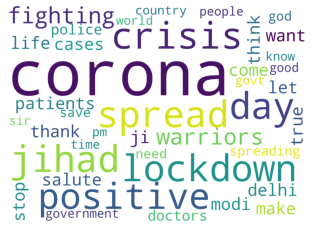

In [24]:
cloud1 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((first_topic_words)))
plt.imshow(cloud1)
plt.axis('off')
plt.show()

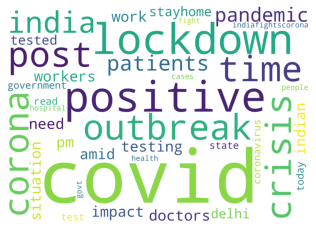

In [25]:
cloud2 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((second_topic_words)))
plt.imshow(cloud2)
plt.axis('off')
plt.show()

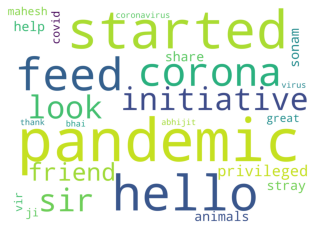

In [26]:
cloud3 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((third_topic_words)))
plt.imshow(cloud3)
plt.axis('off')
plt.show()

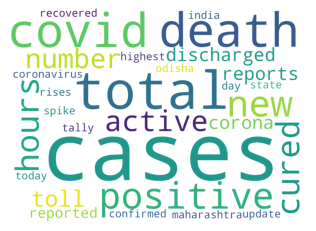

In [27]:
cloud4 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((fourth_topic_words)))
plt.imshow(cloud4)
plt.axis('off')
plt.show()

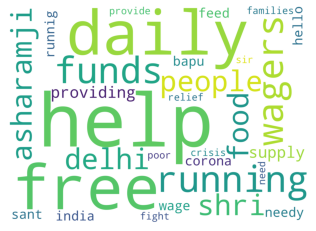

In [28]:
cloud5 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((fifth_topic_words)))
plt.imshow(cloud5)
plt.axis('off')
plt.show()

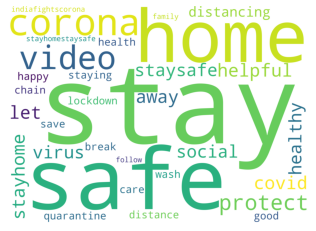

In [29]:
cloud6 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((sixth_topic_words)))
plt.imshow(cloud6)
plt.axis('off')
plt.show()

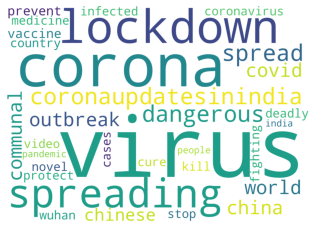

In [30]:
cloud7 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((seventh_topic_words)))
plt.imshow(cloud7)
plt.axis('off')
plt.show()

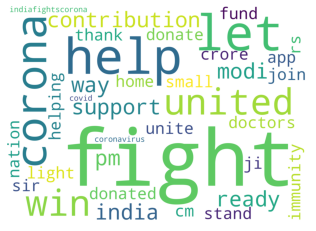

In [31]:
cloud8 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((eight_topic_words)))
plt.imshow(cloud8)
plt.axis('off')
plt.show()

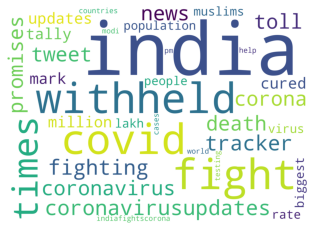

In [32]:
cloud9 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((ninth_topic_words)))
plt.imshow(cloud9)
plt.axis('off')
plt.show()

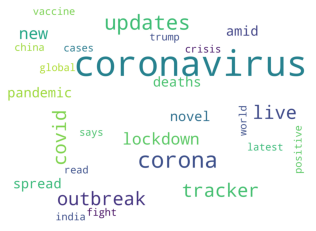

In [33]:
cloud10 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((tenth_topic_words)))
plt.imshow(cloud10)
plt.axis('off')
plt.show()

In [34]:
from textblob import TextBlob

In [35]:
topic1="'make', 'let', 'want', 'come', 'delhi', 'corona cases', 'days', 'corona lockdown', 'thank', 'patients', 'spread corona', 'stop', 'corona jihad', 'think', 'salute', 'ji', 'true', 'life', 'jihad', 'corona crisis', 'modi', 'day', 'police', 'doctors', 'positive', 'corona corona', 'spreading', 'god', 'need', 'crisis', 'save', 'government', 'corona positive', 'fighting corona', 'pm', 'good', 'know', 'country', 'fighting', 'spread', 'govt', 'lockdown', 'corona warriors', 'world', 'sir', 'warriors', 'time', 'like', 'people', 'corona'"
topic2="'amid covid', 'times', 'lockdown covid', 'doctors', 'workers', 'work', 'pm', 'need', 'covid positive', 'impact', 'indian', 'situation', 'testing', 'stayhome', 'delhi', 'positive covid', 'tested', 'government', 'outbreak', 'state', 'read', 'coronavirus covid', 'post covid', 'time', 'covid outbreak', 'today', 'test', 'positive', 'post', 'covid crisis', 'covid corona', 'india covid', 'indiafightscorona', 'crisis', 'covid cases', 'covid patients', 'hospital', 'people', 'govt', 'corona covid', 'health', 'covid lockdown', 'fight covid', 'patients', 'covid india', 'pandemic', 'covid pandemic', 'lockdown', 'covid covid', 'covid'"
topic3="'sonam', 'vir started', 'hello vir', 'virus pandemic', 'hello abhijit', 'pandemic covid', 'pandemic corona', 'great initiative', 'sonam started', 'hello sonam', 'mahesh sir', 'hello mahesh', 'thank', 'ji', 'great', 'bhai started', 'ji started', 'coronavirus pandemic', 'hello sir', 'pandemic help', 'feed look', 'help', 'friend', 'covid pandemic', 'privileged friend', 'help feed', 'corona', 'sir', 'sir started', 'friends', 'hello', 'share', 'privileged friends', 'started', 'look', 'pandemic look', 'pandemic', 'initiative', 'privileged', 'animals', 'look share', 'share privileged', 'corona pandemic', 'stray', 'animals corona', 'initiative feed', 'started initiative', 'stray animals', 'feed stray', 'feed'"
topic4="'odisha', 'cases hours', 'maharashtra', 'hours total', 'death toll', 'cases total', 'covid', 'tally', 'toll', 'cured discharged', 'cases active', 'cases cured', 'day', 'recovered', 'rises', 'highest', 'today', 'corona positive', 'reports new', 'number cases', 'death', 'discharged', 'cured', 'confirmed', 'spike', 'coronavirus cases', 'state', 'reports', 'cases reported', 'cases india', 'update', 'corona cases', 'covid positive', 'total cases', 'new covid', 'active cases', 'total number', 'active', 'hours', 'cases deaths', 'reported', 'new cases', 'number', 'positive cases', 'covid cases', 'positive', 'deaths', 'total', 'new', 'cases'"
topic5="'relief', 'help people', 'needy people', 'provide', 'wage', 'daily wage', 'crisis', 'help fight', 'families', 'sir', 'help corona', 'asharamji bapu', 'shri', 'bapu', 'sant', 'sant shri', 'asharamji', 'shri asharamji', 'need', 'people', 'delhi', 'poor', 'needy', 'corona free', 'feed', 'delhi india', 'india running', 'wagers delhi', 'help feed', 'runnig', 'runnig funds', 'hello', 'free', 'daily', 'food', 'providing', 'supply', 'wagers running', 'running', 'wagers', 'daily wagers', 'free food', 'food supply', 'providing free', 'hello providing', 'supply daily', 'running funds', 'funds', 'funds help', 'help'"
topic6="'good', 'distance', 'care', 'corona', 'happy', 'health', 'break', 'quarantine', 'wash', 'chain', 'covid stay', 'let stay', 'save', 'helpful', 'stay away', 'stayhome staysafe', 'staying', 'video', 'away', 'virus protect', 'video helpful', 'safe video', 'protect stay', 'lockdown', 'safe covid', 'stayhomestaysafe', 'home corona', 'indiafightscorona', 'protect', 'virus stay', 'family', 'stay healthy', 'home safe', 'stayhome', 'staysafe', 'social distancing', 'follow', 'healthy', 'distancing', 'social', 'safe stay', 'let', 'corona stay', 'safe corona', 'home stay', 'stay safe', 'safe', 'stay home', 'home', 'stay'"
topic7="'vaccine', 'prevent', 'outbreak', 'lockdown coronavirus', 'virus spreading', 'virus china', 'novel corona', 'like', 'virus lockdown', 'virus world', 'lockdown', 'coronaupdatesinindia', 'virus like', 'medicine', 'spreading corona', 'covid coronaupdatesinindia', 'fighting', 'wuhan', 'coronaupdatesinindia lockdown', 'cure', 'virus dangerous', 'deadly', 'communal virus', 'virus outbreak', 'virus cases', 'video', 'kill', 'communal', 'stop', 'infected', 'country', 'protect', 'dangerous corona', 'virus pandemic', 'chinese virus', 'virus spread', 'virus india', 'people', 'spread corona', 'spreading', 'virus corona', 'virus covid', 'dangerous', 'chinese', 'world', 'spread', 'china', 'corona', 'corona virus', 'virus'"
topic8="'crore', 'united fight', 'doctors', 'light', 'home fight', 'win fight', 'contribution fight', 'unite', 'way fight', 'cm', 'donated', 'helping', 'pm modi', 'immunity', 'donate', 'united', 'stand', 'thank', 'rs', 'small', 'app', 'sir', 'lets help', 'way', 'nation', 'support fight', 'join', 'corona fight', 'ready', 'fund', 'win', 'modi', 'ji', 'ready fight', 'indiafightscorona', 'contribution', 'help india', 'lets', 'help fight', 'fight coronavirus', 'support', 'help', 'let fight', 'pm', 'india fight', 'let', 'corona', 'fight covid', 'fight corona', 'fight'"
topic9="'million', 'times', 'updates', 'coronavirusupdates', 'cured', 'tally', 'india fighting', 'coronavirusupdates covid', 'fights', 'india fights', 'mark', 'fighting', 'population', 'lakh', 'india india', 'tracker', 'rate', 'people india', 'times india', 'virus india', 'muslims', 'biggest', 'coronavirus india', 'india coronavirus', 'indiafightscorona', 'promises', 'india news', 'india tracker', 'pm', 'help india', 'promises india', 'news', 'testing', 'death toll', 'countries', 'modi', 'toll', 'death', 'world', 'india fight', 'tweet', 'corona india', 'india corona', 'withheld', 'tweet withheld', 'withheld india', 'cases india', 'india covid', 'covid india', 'india'"
topic10="'coronavirus corona', 'covid tracker', 'global', 'deaths', 'coronavirus deaths', 'tracker corona', 'updates corona', 'corona live', 'live tracker', 'read', 'updates covid', 'novel coronavirus', 'corona outbreak', 'novel', 'corona coronavirus', 'coronavirus india', 'spread coronavirus', 'vaccine', 'outbreak coronavirus', 'coronavirus crisis', 'positive coronavirus', 'latest', 'coronavirus coronavirus', 'spread', 'amid coronavirus', 'new coronavirus', 'fight coronavirus', 'live updates', 'trump', 'lockdown coronavirus', 'amid', 'says', 'tracker', 'coronavirus outbreak', 'covid coronavirus', 'world', 'new', 'coronavirus updates', 'pandemic', 'coronavirus lockdown', 'live', 'outbreak', 'coronavirus pandemic', 'coronavirus cases', 'coronavirus covid', 'updates', 'china', 'news', 'lockdown', 'coronavirus'"
blob1 = TextBlob(topic1)
blob2 = TextBlob(topic2)
blob3 = TextBlob(topic3)
blob4 = TextBlob(topic4)
blob5 = TextBlob(topic5)
blob6 = TextBlob(topic6)
blob7 = TextBlob(topic7)
blob8 = TextBlob(topic8)
blob9 = TextBlob(topic9)
blob10 = TextBlob(topic10)
print(blob1.sentiment)
print(blob2.sentiment)
print(blob3.sentiment)
print(blob4.sentiment)
print(blob5.sentiment)
print(blob6.sentiment)
print(blob7.sentiment)
print(blob8.sentiment)
print(blob9.sentiment)
print(blob10.sentiment)

Sentiment(polarity=0.3761363636363636, subjectivity=0.5852272727272727)
Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.08556149732620322, subjectivity=0.6205882352941174)
Sentiment(polarity=0.13333333333333336, subjectivity=0.4222222222222222)
Sentiment(polarity=0.4666666666666667, subjectivity=0.4794871794871795)
Sentiment(polarity=-0.3333333333333333, subjectivity=0.5166666666666667)
Sentiment(polarity=0.3583333333333334, subjectivity=0.48333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.17171717171717166, subjectivity=0.48383838383838385)
